## Aplicação de PanTompkins

Esse notebook tem a finalidade de ler uma dataframe com leituras ECG e separa-las em amostras de batimentos usando o algoritmo de Pantompkins

In [21]:
import sys
import pandas as pd
import numpy as np
sys.path.append('../')

In [22]:
from pacote import pantompkins

In [23]:
df = pd.read_csv('../records/records1[164947007].csv')

In [24]:
df = df.drop(columns=['Unnamed: 0'])

In [25]:
columns = df.columns
df

,0,1,2,3,4,5,6,7,8,9,...,4994,4995,4996,4997,4998,4999,arritmia,leads,fs,arquivo
0,0.215,0.215,0.215,0.214,0.216,0.215,0.192,0.168,0.139,0.100,...,-0.030,-0.030,-0.030,-0.030,-0.030,-0.030,164947007,2,500.0,HR01128
1,0.065,0.065,0.065,0.065,0.065,0.065,0.065,0.065,0.065,0.064,...,-0.210,-0.210,-0.210,-0.210,-0.210,-0.210,164947007,2,500.0,HR17640
2,-0.100,-0.100,-0.100,-0.100,-0.100,-0.100,-0.100,-0.100,-0.100,-0.100,...,0.145,0.145,0.145,0.145,0.145,0.145,164947007,2,500.0,HR12788
3,-0.054,-0.054,-0.034,-0.049,-0.059,-0.049,-0.049,-0.049,-0.054,-0.049,...,0.098,0.088,0.093,0.117,0.107,0.083,164947007,2,500.0,JS28698
4,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,-0.012,-0.007,-0.005,...,0.040,0.040,0.040,0.040,0.040,0.040,164947007,2,500.0,HR04135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,-0.160,-0.160,-0.160,-0.160,-0.160,-0.160,-0.156,-0.154,-0.156,-0.154,...,0.070,0.070,0.070,0.070,0.070,0.070,164947007,2,500.0,HR12754
388,0.050,0.050,0.050,0.050,0.050,0.050,0.050,0.047,0.044,0.045,...,-0.005,-0.005,-0.005,-0.005,-0.005,-0.005,164947007,2,500.0,HR09791
389,-0.115,-0.115,-0.115,-0.115,-0.115,-0.115,-0.115,-0.116,-0.113,-0.110,...,0.135,0.135,0.135,0.135,0.135,0.135,164947007,2,500.0,HR16564
390,-0.040,-0.040,-0.040,-0.040,-0.040,-0.040,-0.040,-0.040,-0.040,-0.040,...,0.065,0.065,0.065,0.065,0.065,0.065,164947007,2,500.0,HR02096


In [6]:
data_beat = pd.DataFrame()

In [27]:
N = len(df)
for x in range(N):
    print(str(x)+"/"+str(N))
    data_beat = data_beat.append(pantompkins.batimentos(
        df.iloc[x][columns[:-4]],#sinal
        df.iloc[x][columns[-4]],#codigo
        df.iloc[x][columns[-2]],#frequencia
        df.iloc[x][columns[-3]]))#lead

0/392
1/392
2/392
3/392
4/392
5/392
6/392
7/392
8/392
9/392
10/392
11/392
12/392
13/392
14/392
15/392
16/392
17/392
18/392
19/392
20/392
21/392
22/392
23/392
24/392
25/392
26/392
27/392
28/392
29/392
30/392
31/392
32/392
33/392
34/392
35/392
36/392
37/392
38/392
39/392
40/392
41/392
42/392
43/392
44/392
45/392
46/392
47/392
48/392
49/392
50/392
51/392
52/392
53/392
54/392
55/392
56/392
57/392
58/392
59/392
60/392
61/392
62/392
63/392
64/392
65/392
66/392
67/392
68/392
69/392
70/392
71/392
72/392
73/392
74/392
75/392
76/392
77/392
78/392
79/392
80/392
81/392
82/392
83/392
84/392
85/392
86/392
87/392
88/392
89/392
90/392
91/392
92/392
93/392
94/392
95/392
96/392
97/392
98/392
99/392
100/392
101/392
102/392
103/392
104/392
105/392
106/392
107/392
108/392
109/392
110/392
111/392
112/392
113/392
114/392
115/392
116/392
117/392
118/392
119/392
120/392
121/392
122/392
123/392
124/392
125/392
126/392
127/392
128/392
129/392
130/392
131/392
132/392
133/392
134/392
135/392
136/392
137/392
138/39

In [28]:
data_beat

,0,1,2,3,4,5,6,7,8,9,...,318,319,320,321,322,323,324,325,326,327
0,-0.071,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070,...,-0.030,-0.027,-0.024,-0.025,-0.025,-0.025,-0.022,-0.019,164947007.0,2.0
1,-0.065,-0.065,-0.061,-0.060,-0.060,-0.060,-0.060,-0.060,-0.057,-0.054,...,-0.005,-0.009,-0.024,-0.035,-0.031,-0.029,-0.030,-0.030,164947007.0,2.0
2,-0.070,-0.072,-0.069,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070,...,-0.015,-0.015,-0.015,-0.010,-0.012,-0.001,0.008,-0.020,164947007.0,2.0
3,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070,...,0.035,0.035,0.035,0.035,0.032,0.029,0.030,0.030,164947007.0,2.0
4,-0.003,0.007,0.013,0.023,0.030,0.023,0.013,0.008,0.003,-0.005,...,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,164947007.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,0.040,0.036,0.031,0.030,0.029,0.025,0.025,0.023,0.017,0.015,...,0.067,0.057,0.055,0.088,0.103,0.109,0.115,0.110,164947007.0,2.0
7,0.040,0.033,0.021,0.011,0.003,-0.005,-0.009,-0.013,-0.017,-0.021,...,0.101,0.093,0.090,0.090,0.087,0.085,0.085,0.080,164947007.0,2.0
8,0.034,0.030,0.030,0.027,0.024,0.025,0.025,0.021,0.020,0.020,...,0.015,0.014,0.016,0.025,0.033,0.041,0.048,0.049,164947007.0,2.0
9,0.000,-0.007,-0.015,-0.023,-0.031,-0.039,-0.047,-0.055,-0.060,-0.060,...,-0.012,-0.006,-0.003,0.001,0.005,0.009,0.014,0.014,164947007.0,2.0


In [29]:
import matplotlib.pyplot as plt

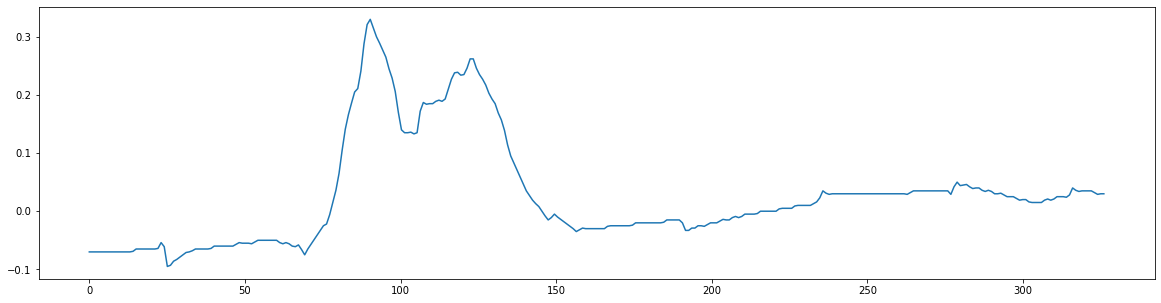

In [33]:
plt.figure(figsize=(20,5))
plt.plot(np.linspace(0,326,326),data_beat.iloc[3][data_beat.columns[:-2]])

In [35]:
data_beat.to_csv('../beats/data_beat_'+str(df.iloc[0][columns[-4]])+'.csv')